<a href="https://colab.research.google.com/github/akashverma55/CarPricePrediction/blob/main/CarPrice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
import seaborn as sns
from sklearn import metrics
from matplotlib import pyplot as plt

In [ ]:
car_data=pd.read_csv('/content/car data.csv')

In [ ]:
car_data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [ ]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [ ]:
car_data.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [ ]:
car_data.shape

(301, 9)

In [ ]:
car_data.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [ ]:
# checking the distribution of the categorical data
print(car_data.Fuel_Type.value_counts())
print(car_data.Seller_Type.value_counts())
print(car_data.Transmission.value_counts())
print(car_data.Car_Name.value_counts())

Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64
Seller_Type
Dealer        195
Individual    106
Name: count, dtype: int64
Transmission
Manual       261
Automatic     40
Name: count, dtype: int64
Car_Name
city                      26
corolla altis             16
verna                     14
fortuner                  11
brio                      10
                          ..
Hero Honda CBZ extreme     1
Bajaj Pulsar RS200         1
Honda Activa 125           1
TVS Jupyter                1
etios gd                   1
Name: count, Length: 97, dtype: int64


Encoding the categoriacl data

In [ ]:
# encoding the fuel_type
car_data.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}}, inplace=True)

# encoding the seller_type
car_data.replace({'Seller_Type':{'Dealer':0,'Individual':1}}, inplace=True)

# encoding the fuel_type
car_data.replace({'Transmission':{'Manual':0,'Automatic':1,}}, inplace=True)

In [ ]:
car_data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


In [ ]:
x=car_data.drop(['Car_Name','Selling_Price'], axis=1)
y=car_data['Selling_Price']

In [ ]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y, test_size=0.1 ,random_state=2)

Model Training

In [ ]:
linear_model=LinearRegression()

In [ ]:
linear_model.fit(xtrain,ytrain)

LinearRegression()

Model Evaluation

In [ ]:
Training_data_prediction=linear_model.predict(xtrain)

In [ ]:
training_accuracy=metrics.r2_score(Training_data_prediction,ytrain)

In [ ]:
training_accuracy

0.8635655509198777

In [ ]:
testing_data_prediction=linear_model.predict(xtest)

In [ ]:
testing_accuracy=metrics.r2_score(testing_data_prediction,ytest)

In [ ]:
testing_accuracy

0.8062199941176358

In [ ]:
lasso_model=Lasso()

In [ ]:
lasso_model.fit(xtrain,ytrain)

Lasso()

In [ ]:
trainingp=lasso_model.predict(xtrain)
trainaccu=metrics.r2_score(trainingp,ytrain)
trainaccu

0.798459024070425

In [ ]:
testingp=lasso_model.predict(xtest)
testaccu=metrics.r2_score(testingp,ytest)
testaccu

0.7711110403265475

Visualizing the actual data and predictive data

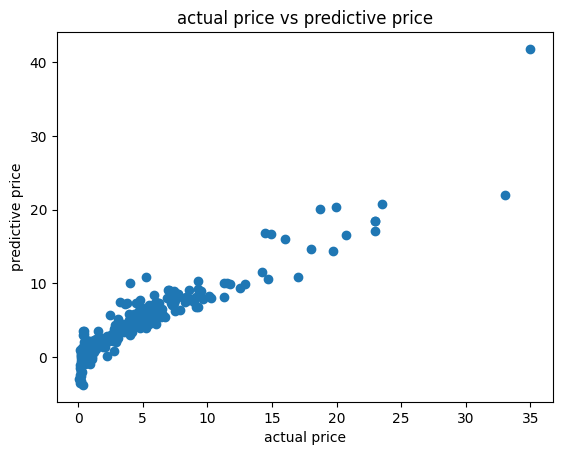

In [ ]:
plt.scatter(ytrain,Training_data_prediction)
plt.xlabel('actual price')
plt.ylabel('predictive price')
plt.title('actual price vs predictive price')
plt.show()